In [1]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split
from offline_models.Bayes import Bayes
from offline_models.FeatureSelection import FeatureSelection
from offline_models.Graphics import Graphics
from offline_models.RandomForest import RandomForest


In [2]:
generos = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller', 'War', 'Western', 'adult','movie_popularity','movie_overall_grade']

def read_parquet(pasta):
    arquivos_parquet = glob.glob(os.path.join(pasta, '*.parquet'))
    lista_df = [pd.read_parquet(arquivo) for arquivo in arquivos_parquet]
    df = pd.concat(lista_df, ignore_index=True)
    return df

In [3]:
df_parquet = read_parquet('./preprocess/movies')[generos]
label = 'Action'
features = generos.copy()
features.remove(label)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_parquet[features], df_parquet[label], test_size=0.3, random_state=42, stratify=df_parquet[label])
selection = FeatureSelection(X_train, y_train)
bayes = Bayes(X_train, X_test, y_train, y_test)
random_forest = RandomForest(X_train, X_test, y_train, y_test)
plot = Graphics()

## Bayes

In [5]:
VERSAO = ['all_features', 'pca', 'SelectKBest', 'RandomForest'] # ['all_features', 'pca', 'SelectKBest', 'RandomForest']
dataNB_media = {}
dataNB_test = {}
for v in VERSAO:
    if v == 'all_features':
        dataNB_media[v], dataNB_test[v] = bayes.features("ALL FEATURES")
    if v == 'pca':
        dataNB_media[v], dataNB_test[v] = bayes.features_pca()
    if v == 'SelectKBest':
        generos_selecionados = selection.func_SelectKBest()
        dataNB_media[v], dataNB_test[v] = bayes.features("Select KBest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')
    if v == 'RandomForest':
        generos_selecionados = selection.func_RandomForest()
        dataNB_media[v], dataNB_test[v] = bayes.features("Random Forest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')  
        

=============   ALL FEATURES - Media  das validações  ==============
Média de Precisão: 0.8535 ± 0.0052
Média de Revocação: 0.6928 ± 0.0103
Média de F1-Score: 0.7346 ± 0.0087
Média de Acurácia: 0.6928 ± 0.0103
Melhor var_smoothing encontrado: 0.015264179671752302
=============   ALL FEATURES - Teste  ==============
Média de Precisão: 0.8537 ± 0.0000
Média de Revocação: 0.6981 ± 0.0000
Média de F1-Score: 0.7390 ± 0.0000
Média de Acurácia: 0.6981 ± 0.0000
Melhor var_smoothing encontrado: 0.015264179671752302
=============  PCA - Media das validações  ==============
Média de Precisão: 0.8319 ± 0.0048
Média de Revocação: 0.7648 ± 0.0089
Média de F1-Score: 0.7884 ± 0.0072
Média de Acurácia: 0.7648 ± 0.0089
Melhor var_smoothing encontrado: 0.06866488450042998
=============   PCA - Teste  ==============
Média de Precisão: 0.8300 ± 0.0000
Média de Revocação: 0.7587 ± 0.0000
Média de F1-Score: 0.7836 ± 0.0000
Média de Acurácia: 0.7587 ± 0.0000
Melhor var_smoothing encontrado: 0.0686648845004299

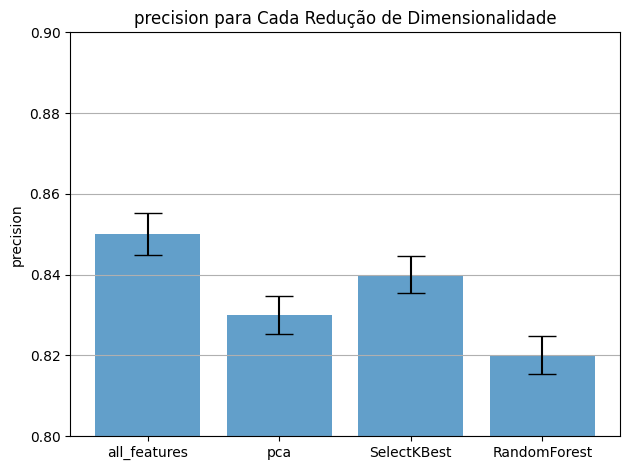

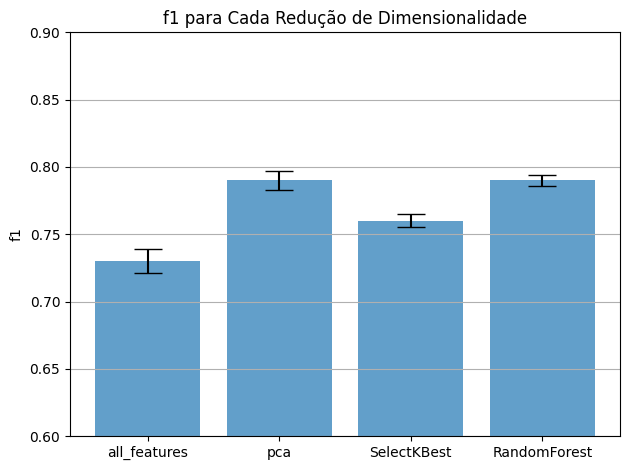

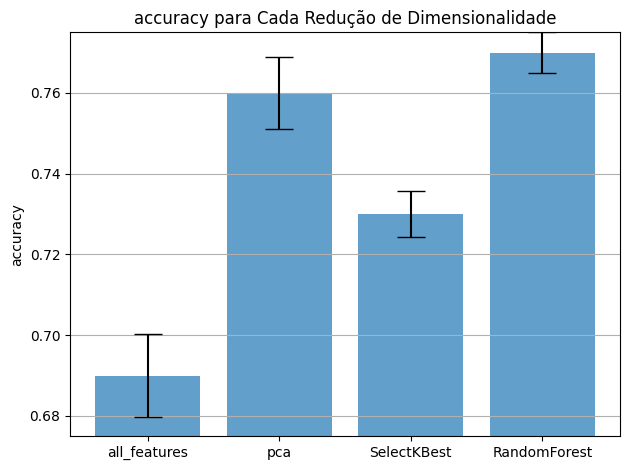

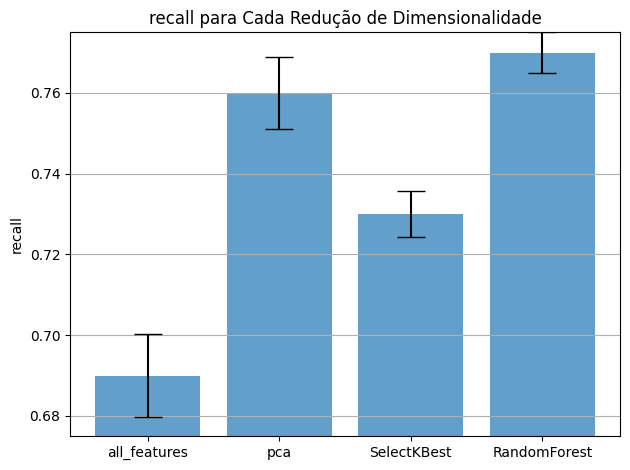

In [6]:
plot.modelo_unico(dataNB_media, 'precision', [0.8, 0.9])
plot.modelo_unico(dataNB_media, 'f1')
plot.modelo_unico(dataNB_media, 'accuracy', [0.675, 0.775])
plot.modelo_unico(dataNB_media, 'recall', [0.675, 0.775])

In [ ]:
plot.modelo_unico(dataNB_test, 'precision', interval=[0.8, 0.9])
plot.modelo_unico(dataNB_test, 'f1')
plot.modelo_unico(dataNB_test, 'accuracy', interval=[0.675, 0.775])
plot.modelo_unico(dataNB_test, 'recall', interval=[0.675, 0.775])

## Random Forest

In [5]:
VERSAO = ['all_features', 'pca', 'SelectKBest', 'RandomForest'] # ['all_features', 'pca', 'SelectKBest', 'RandomForest']
dataRF_media = {}
dataRF_test = {}
for v in VERSAO:
    if v == 'all_features':
        dataRF_media[v], dataRF_test[v] = random_forest.features("ALL FEATURES")
    if v == 'pca':
        dataRF_media[v], dataRF_test[v] = random_forest.features_pca()
    if v == 'SelectKBest':
        generos_selecionados = selection.func_SelectKBest()
        dataRF_media[v], dataRF_test[v] = random_forest.features("Select KBest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')
    if v == 'RandomForest':
        generos_selecionados = selection.func_RandomForest()
        dataRF_media[v], dataRF_test[v] = random_forest.features("Random Forest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')  

# PRA MELHORAR O TEMPO DO RANDOM FOREST TEM QUE MUDAR OS HIPERPARAMETROS

=============   ALL FEATURES - Media   ==============
Média de Precisão: 0.8640 ± 0.0025
Média de Revocação: 0.7755 ± 0.0091
Média de F1-Score: 0.8017 ± 0.0072
Média de Acurácia: 0.7755 ± 0.0091
Melhor n_estimators encontrado: 500
Melhor criterion encontrado: entropy
Melhor max_depth encontrado: 15
Melhor min_samples_split encontrado: 25
Melhor min_samples_leaf encontrado: 2
Melhor max_features encontrado: log2
Melhor bootstrap encontrado: True
=============   ALL FEATURES - Teste  ==============
Média de Precisão: 0.8655 ± 0.0000
Média de Revocação: 0.7782 ± 0.0000
Média de F1-Score: 0.8040 ± 0.0000
Média de Acurácia: 0.7782 ± 0.0000
Melhor n_estimators encontrado: 500
Melhor criterion encontrado: entropy
Melhor max_depth encontrado: 15
Melhor min_samples_split encontrado: 25
Melhor min_samples_leaf encontrado: 2
Melhor max_features encontrado: log2
Melhor bootstrap encontrado: True
=============   PCA - Media   ==============
Média de Precisão: 0.8593 ± 0.0020
Média de Revocação: 0.7

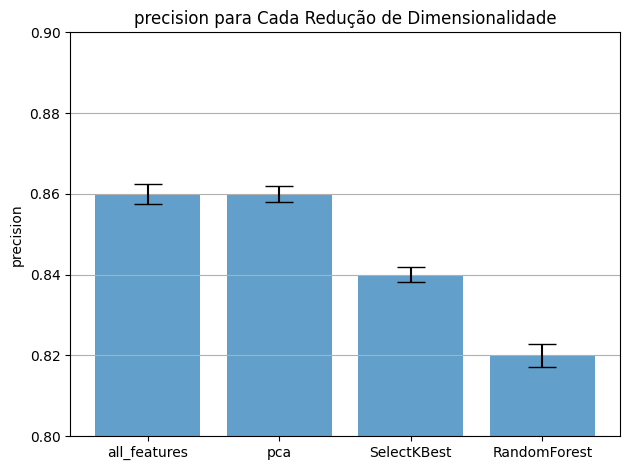

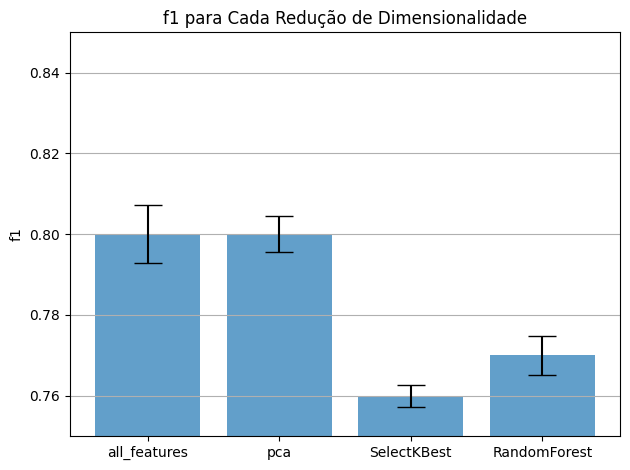

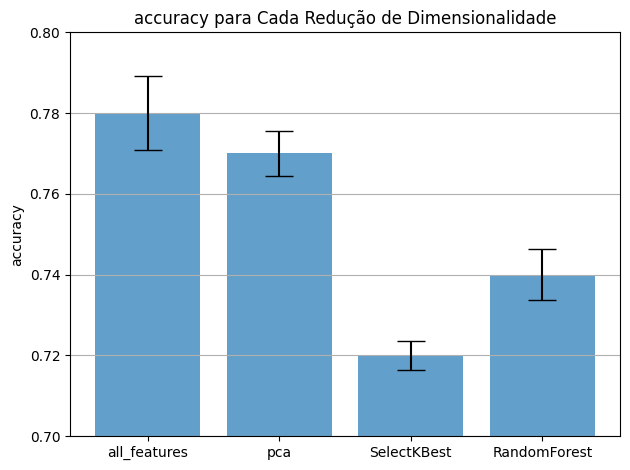

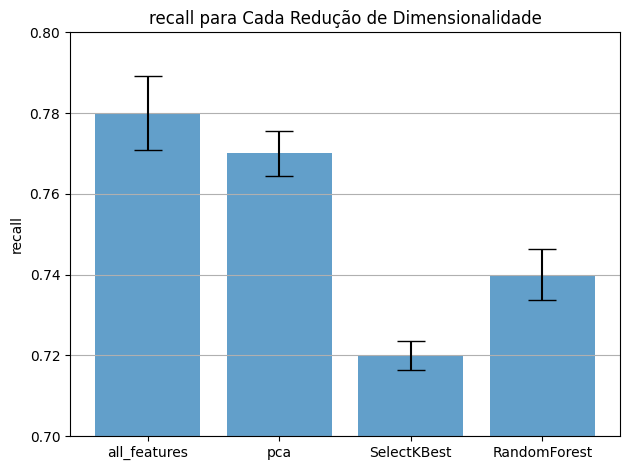

In [8]:
plot.modelo_unico(dataRF_media, 'precision', [0.8, 0.9])
plot.modelo_unico(dataRF_media, 'f1', [0.75, 0.85])
plot.modelo_unico(dataRF_media, 'accuracy')
plot.modelo_unico(dataRF_media, 'recall', [0.7, 0.8])

## Comparando todos modelos

In [5]:
# json = {
#     "random_forest": dataRF_media,
#     "bayes": dataNB_media,
#     # "svm": dataSVM_media,  # Adicione mais modelos conforme necessário
# }

# exemplo de json
json = {
 'random_forest': {
  'all_features': {
   'mean_f1': 0.8,
   'std_f1': 0.0072,
   'mean_accuracy': 0.78,
   'std_accuracy': 0.0091,
   'mean_recall': 0.78,
   'std_recall': 0.0091,
   'mean_precision': 0.86,
   'std_precision': 0.0025},
  'pca': {'mean_f1': 0.8,
   'std_f1': 0.0044,
   'mean_accuracy': 0.77,
   'std_accuracy': 0.0055,
   'mean_recall': 0.77,
   'std_recall': 0.0055,
   'mean_precision': 0.86,
   'std_precision': 0.002},
  'SelectKBest': {'mean_f1': 0.76,
   'std_f1': 0.0027,
   'mean_accuracy': 0.72,
   'std_accuracy': 0.0036,
   'mean_recall': 0.72,
   'std_recall': 0.0036,
   'mean_precision': 0.84,
   'std_precision': 0.0019},
  'RandomForest': {'mean_f1': 0.77,
   'std_f1': 0.0048,
   'mean_accuracy': 0.74,
   'std_accuracy': 0.0063,
   'mean_recall': 0.74,
   'std_recall': 0.0063,
   'mean_precision': 0.82,
   'std_precision': 0.0029}
  },
 'bayes': {
  'all_features': {'mean_f1': 0.73,
   'std_f1': 0.0087,
   'mean_accuracy': 0.69,
   'std_accuracy': 0.0103,
   'mean_recall': 0.69,
   'std_recall': 0.0103,
   'mean_precision': 0.85,
   'std_precision': 0.0052},
  'pca': {'mean_f1': 0.79,
   'std_f1': 0.0072,
   'mean_accuracy': 0.76,
   'std_accuracy': 0.0089,
   'mean_recall': 0.76,
   'std_recall': 0.0089,
   'mean_precision': 0.83,
   'std_precision': 0.0048},
  'SelectKBest': {'mean_f1': 0.76,
   'std_f1': 0.0047,
   'mean_accuracy': 0.73,
   'std_accuracy': 0.0057,
   'mean_recall': 0.73,
   'std_recall': 0.0057,
   'mean_precision': 0.84,
   'std_precision': 0.0046},
  'RandomForest': {'mean_f1': 0.79,
   'std_f1': 0.0042,
   'mean_accuracy': 0.77,
   'std_accuracy': 0.0051,
   'mean_recall': 0.77,
   'std_recall': 0.0051,
   'mean_precision': 0.82,
   'std_precision': 0.0047}
  }
}


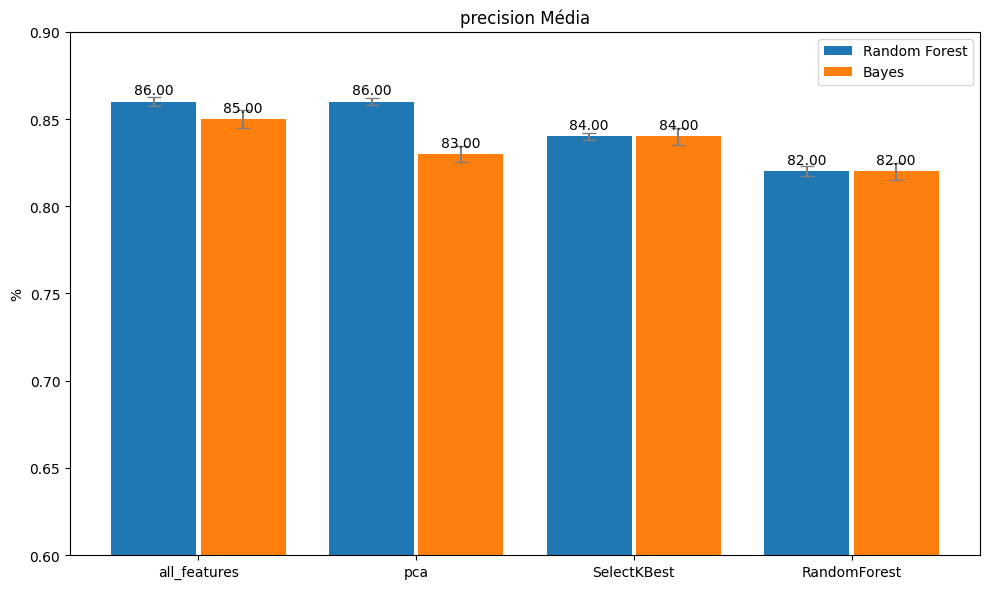

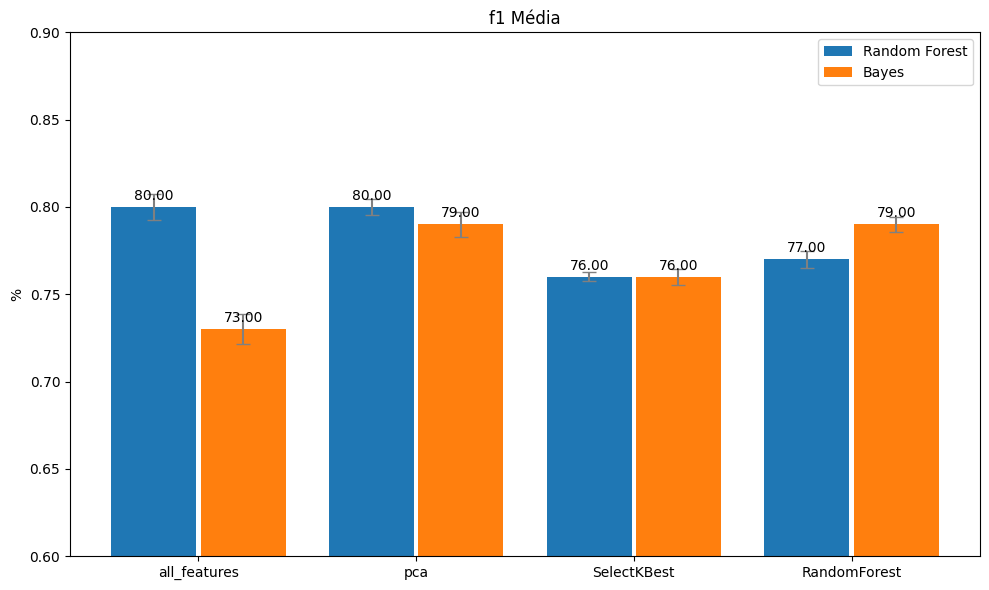

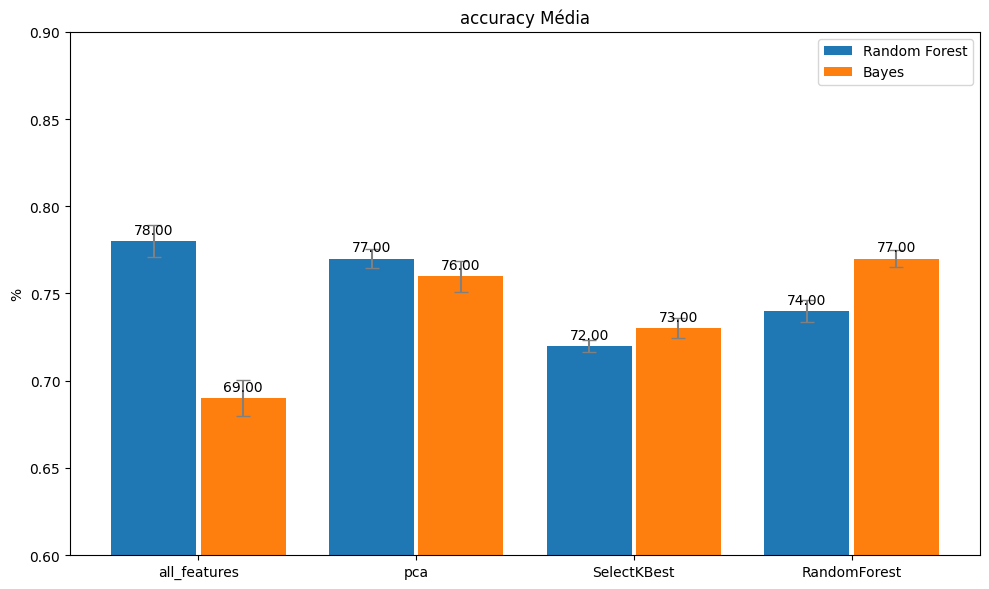

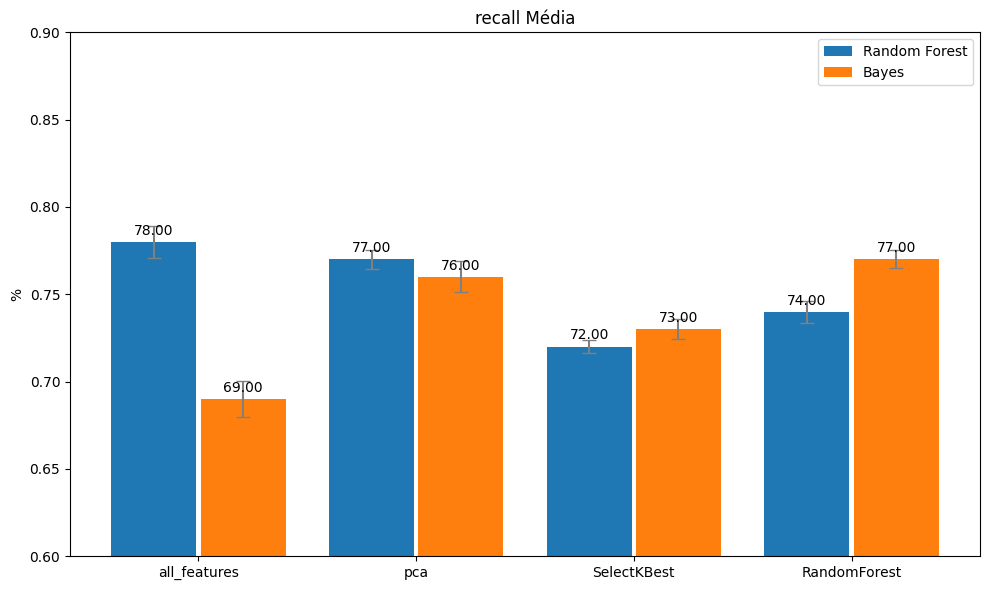

In [6]:
plot.n_modelos(json, 'precision')
plot.n_modelos(json, 'f1')
plot.n_modelos(json, 'accuracy')
plot.n_modelos(json, 'recall')